In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import zipfile

### 1. Read Data

Ecommerce dataset is a csv file and stored in zip. So, we have to unzip it before reading using pandas.

In [2]:
zf    = zipfile.ZipFile('../data/raw/ecommerce-data.zip')
order = pd.read_csv(zf.open('data.csv'), encoding ='ISO-8859-1', parse_dates= ["InvoiceDate"])
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1. InvoiceNo: Invoice number. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. Description: Product (item) name. Nominal. 
4. Quantity: The quantities of each product (item) per transaction. Numeric. 
5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
8. Country: Country name. Nominal, the name of the country where each customer resides.

In [3]:
order.shape

(541909, 8)

In [4]:
# Delete the specific time : hours, minute and seconds
order = order.assign(InvoiceDate=order.InvoiceDate.dt.round('D'))
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [5]:
order.set_index(['InvoiceDate'], inplace=True)
order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [6]:
order.index

DatetimeIndex(['2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01',
               ...
               '2011-12-10', '2011-12-10', '2011-12-10', '2011-12-10',
               '2011-12-10', '2011-12-10', '2011-12-10', '2011-12-10',
               '2011-12-10', '2011-12-10'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

The data frame contain transaction from 2012-12-12 to 2012-12-09.  

### 2. Handle Missing Data

In [7]:
# Determine null data column
order.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Determine null percentage each column
order.isnull().sum()/order.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

Assign "unknown" and -99999 to handle missing data in description and CostumerID column. 

In [9]:
order.fillna({})
order = order.fillna({
    'Description': 'unknown',
    'CustomerID' : -99999
})
order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [10]:
#count null data each column
#make sure all column has no null data
order.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. Check the Datatype

In [11]:
order.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 to 2011-12-10
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
UnitPrice      541909 non-null float64
CustomerID     541909 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
print("InvoiceNo    :", type(order.InvoiceNo[0]))
print("StockCode    :", type(order.StockCode[0]))
print("Description  :", type(order.Description[0]))
print("Quantity     :", type(order.Quantity[0]))
print("UnitPrice    :", type(order.UnitPrice[0]))
print("CustomerID   :", type(order.CustomerID[0]))
print("Country      :", type(order.Country[0]))

InvoiceNo    : <class 'str'>
StockCode    : <class 'str'>
Description  : <class 'str'>
Quantity     : <class 'numpy.int64'>
UnitPrice    : <class 'numpy.float64'>
CustomerID   : <class 'numpy.float64'>
Country      : <class 'str'>


Note : 
1. InvoiceNo's and StockCode's data type are a string because some of the data starts with a character 'c'. It means the costumer make a cancelation.
2. CostumerID's data type is a float, it should be an integer.

In [13]:
# convert quantity into integer
order.Quantity.astype("int")
print("Quantity     :", type(order.Quantity[0]))

Quantity     : <class 'numpy.int64'>


In [14]:
# convert description into lower case
order.Description = order.Description.apply(lambda x : x.lower())

### 4. Get Real Order Dataframe

#### 4.1 Handle Wrong Format

Let's check wrong format in each column.

In [15]:
df = order[order['Quantity']<=0]
print(df.shape)
df.head()

(10624, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,C536379,D,discount,-1,27.50,14527.0,United Kingdom
2010-12-01,C536383,35004C,set of 3 coloured flying ducks,-1,4.65,15311.0,United Kingdom
2010-12-01,C536391,22556,plasters in tin circus parade,-12,1.65,17548.0,United Kingdom
2010-12-01,C536391,21984,pack of 12 pink paisley tissues,-24,0.29,17548.0,United Kingdom
2010-12-01,C536391,21983,pack of 12 blue paisley tissues,-24,0.29,17548.0,United Kingdom


In [16]:
df.Description.unique()

array(['discount', 'set of 3 coloured  flying ducks',
       'plasters in tin circus parade ', ...,
       'small square cut glass candlestick',
       'house shape pencil sharpener', 'paper craft , little birdie'],
      dtype=object)

In [17]:
df = order[order['StockCode']=='D']
print(df.shape)
df.head()

(77, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,C536379,D,discount,-1,27.50,14527.0,United Kingdom
2010-12-06,C537164,D,discount,-1,29.29,14527.0,United Kingdom
2010-12-08,C537597,D,discount,-1,281.00,15498.0,United Kingdom
2010-12-09,C537857,D,discount,-1,267.12,17340.0,United Kingdom
2010-12-15,C538897,D,discount,-1,5.76,16422.0,United Kingdom


In [18]:
df = order[order['UnitPrice']<0]
print(df.shape)
df

(2, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-08-13,A563186,B,adjust bad debt,1,-11062.06,-99999.0,United Kingdom
2011-08-13,A563187,B,adjust bad debt,1,-11062.06,-99999.0,United Kingdom


In [19]:
df = order[order['Description']=='adjust bad debt']
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-08-13,A563185,B,adjust bad debt,1,11062.06,-99999.0,United Kingdom
2011-08-13,A563186,B,adjust bad debt,1,-11062.06,-99999.0,United Kingdom
2011-08-13,A563187,B,adjust bad debt,1,-11062.06,-99999.0,United Kingdom


We don't need Discount and "Adjust Bad Debt" data, so we'll delete this data on the order data frame.

In [20]:
df = order[order['UnitPrice']==0]
df = df[df['Quantity']>0]
print(df.shape)
df

(1179, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536414,22139,unknown,56,0.0,-99999.0,United Kingdom
2010-12-02,536545,21134,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536546,22145,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536547,37509,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536549,85226A,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536550,85044,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536552,20950,unknown,1,0.0,-99999.0,United Kingdom
2010-12-02,536553,37461,unknown,3,0.0,-99999.0,United Kingdom
2010-12-02,536554,84670,unknown,23,0.0,-99999.0,United Kingdom


It is possible to get the price equals to zero. So we keep the data. 

In [21]:
# Selected data only with quantity and unitPrice > or >= zero
real_order = order[order['Quantity']  > 0]
real_order = real_order[real_order['UnitPrice'] >= 0]
real_order = real_order[real_order['Description']!='adjust bad debt']
real_order.shape

(531282, 7)

#### 4.2 Check Duplicate Data

In [22]:
duplicate_order = real_order[real_order.duplicated()]
duplicate_order

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536409,21866,union jack flag luggage tag,1,1.25,17908.0,United Kingdom
2010-12-01,536409,22866,hand warmer scotty dog design,1,2.10,17908.0,United Kingdom
2010-12-01,536409,22900,set 2 tea towels i love london,1,2.95,17908.0,United Kingdom
2010-12-01,536409,22111,scottie dog hot water bottle,1,4.95,17908.0,United Kingdom
2010-12-01,536412,22327,round snack boxes set of 4 skulls,1,2.95,17920.0,United Kingdom
2010-12-01,536412,22273,feltcraft doll molly,1,2.95,17920.0,United Kingdom
2010-12-01,536412,22749,feltcraft princess charlotte doll,1,3.75,17920.0,United Kingdom
2010-12-01,536412,22141,christmas craft tree top angel,1,2.10,17920.0,United Kingdom
2010-12-01,536412,21448,12 daisy pegs in wood box,1,1.65,17920.0,United Kingdom


There is no duplicate data in the dataframe. 

### 5 Real Order Description

In [23]:
real_order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom


In [24]:
real_order.shape

(531282, 7)

#### 5. 1 Transactions by country

Text(0.5, 1.0, 'Top 10 Transaction by Country')

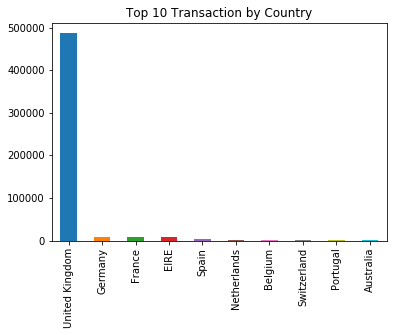

In [25]:
%matplotlib inline
real_order.Country.value_counts().head(10).plot.bar()
plt.title("Top 10 Transaction by Country")

Text(0.5, 1.0, 'Not Popular Transaction by Country')

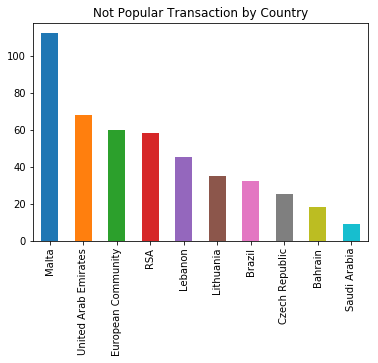

In [26]:
real_order.Country.value_counts().tail(10).plot.bar()
plt.title("Not Popular Transaction by Country")

#### 5.2 Transactions by time

Text(0.5, 1.0, 'Transaction by Time (Month)')

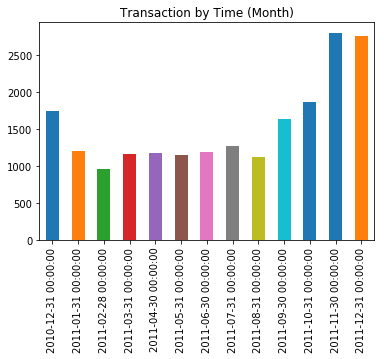

In [27]:
real_order.reset_index(inplace=True)
transaction = real_order.InvoiceDate.value_counts()
transaction.resample('M').mean().plot.bar()
plt.title("Transaction by Time (Month)")

#### 5.3 Transactions by customer

In [28]:
customer = real_order.CustomerID.value_counts()
customer.head()

-99999.0    133358
 17841.0      7847
 14911.0      5677
 14096.0      5111
 12748.0      4596
Name: CustomerID, dtype: int64

In [29]:
customer = customer.drop([-99999.0])

Text(0.5, 1.0, 'Top Ten Customer')

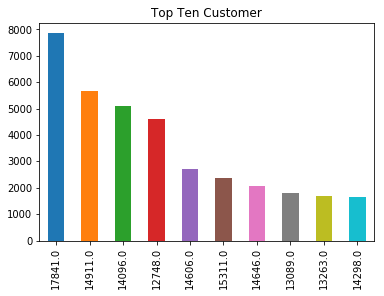

In [30]:
# top ten customer
customer.head(10).plot.bar()
plt.title("Top Ten Customer")

#### 5.4 Most Wanted Product

Text(0.5, 1.0, 'Most Wanted Product')

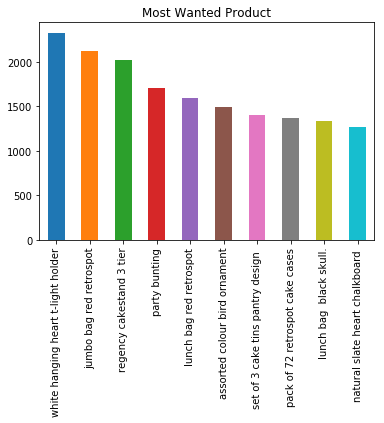

In [31]:
product = real_order.Description.value_counts()
product.head(10).plot.bar()
plt.title("Most Wanted Product")

Text(0.5, 1.0, 'Not Popular Product')

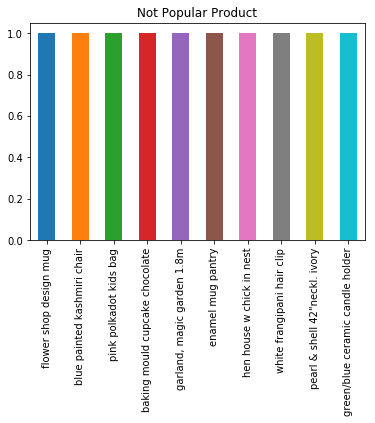

In [32]:
product.tail(10).plot.bar()
plt.title("Not Popular Product")

### 6. Company Income

In [33]:
real_order = real_order.set_index('InvoiceDate')
real_order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom


In [34]:
real_order['Income'] = real_order['Quantity']*real_order['UnitPrice']
real_order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Income
InvoiceDate,,,,,,,,
2010-12-01,536365,85123A,white hanging heart t-light holder,6,2.55,17850.0,United Kingdom,15.30
2010-12-01,536365,71053,white metal lantern,6,3.39,17850.0,United Kingdom,20.34
2010-12-01,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850.0,United Kingdom,22.00
2010-12-01,536365,84029G,knitted union flag hot water bottle,6,3.39,17850.0,United Kingdom,20.34
2010-12-01,536365,84029E,red woolly hottie white heart.,6,3.39,17850.0,United Kingdom,20.34


Text(0.5, 1.0, 'Total Income per Month')

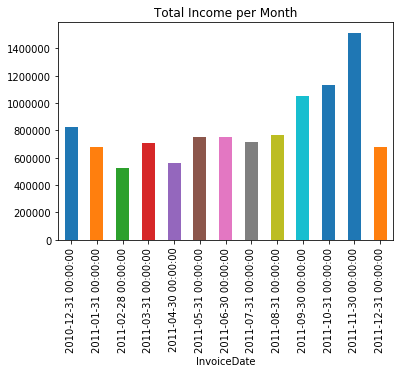

In [35]:
real_order.Income.resample('M').sum().plot.bar()
plt.title("Total Income per Month")